# <p style="color:darkblue">Introdução ao Aprendizado Profundo</p>

<hr>




* Neste Jupyter-Notebook farei uma introdução ao Aprendizado Profundo (Deep Learning), que é um subset do que abordaremos previamente (Machine Learning). Nossa introdução será feita com o framework de Deep Learning chamado Pytorch (Facebook) que é atualmente um dos mais usados junto com o Tensorflow (Google). Os dois são de extrema importância atualmente e são os mais usados majoritariamente nas grandes conferências, com o Pytorch tendo uma crescente nos últimos anos. Escolhemos Pytorch para o intuito dessa atividade, pois **eu** estou estudando pytorch, mas o tensorflow também executaria com quase a mesma eficiência e complexidade.

<a href="https://colab.research.google.com/github/ItamarRocha/AI-Introduction/blob/main/Machine%20Learning/Introdu%C3%A7%C3%A3o%20ao%20Aprendizado%20de%20%20M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - O que é Pytorch?

<p align="center">
   <img src="images/pytorch.png" width="500px">
</p>

Pytorch é uma biblioteca otimizada de cálculo com tensores para Deep Learning. Ou seja, é usada sobretudo para o treinamento de redes neurais.

## 2 - Setting up

botar todas as bibs pra instalar

In [1]:
from data_generator import get_data
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from sklearn.metrics import confusion_matrix

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

## 3 - Tensores

### 3.1 - O que é um tensor?

Os cálculos feitos pelas redes neurais são um monte de operações de álgebra linear com **tensores**. Um vetor é um tensor de uma dimensão, uma matrix um de duas dimensãos e uma imagem RGB pode ser um tensor de três dimensões. Basicamente todos os frameworks de Deep Learning são construídos com base em tensores, assim como o Pytorch. 

<img src="images/tensor_examples.svg" width=600px>

Abaixo vamos entender um pouco como manipular eles e alguns conceitos.

In [2]:
import torch
import numpy as np

### 3.2 - Criando Tensores

Vamos começar criando um tensor armazenando um único número.

In [3]:
# Número
t1 = torch.tensor(2.)
t1

tensor(2.)

O 2. significa que estamos trabalhando com um float. Podemos checar o tipo dos nossos tensores através do dtype.

In [4]:
t1.dtype

torch.float32

Vamos criar tensores mais complexos.

In [5]:
# Vetor
t2 = torch.tensor([1,1,1,1])
t2

tensor([1, 1, 1, 1])

In [6]:
# Matriz
t3 = torch.tensor([[1,2],
                   [3,4],
                   [5,6]])
t3

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [7]:
# Array tri dimensional
t4 = torch.tensor([
    [[1,2,3],
     [4,5,6]],
    [[7,8,9],
     [10,11,12]]
])
t4

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])

Os tensores podem ter várias dimensões e diferentes tamanhos em cada dimensão. Para vermos a dimensão podemos usar o .shape.

In [8]:
print(t2)
t2.shape

tensor([1, 1, 1, 1])


torch.Size([4])

In [9]:
print(t4)
t4.shape

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])


torch.Size([2, 2, 3])

Vamos agora ver como podemos criar tensores a partir do numpy e qual a relação com os tensores.

In [10]:
a = np.random.rand(4,3)
a

array([[0.29817943, 0.23920222, 0.3123924 ],
       [0.52259475, 0.74528034, 0.12337255],
       [0.99842145, 0.33116001, 0.43108809],
       [0.65885665, 0.8260999 , 0.42605301]])

In [11]:
b = torch.from_numpy(a)
b

tensor([[0.2982, 0.2392, 0.3124],
        [0.5226, 0.7453, 0.1234],
        [0.9984, 0.3312, 0.4311],
        [0.6589, 0.8261, 0.4261]], dtype=torch.float64)

In [12]:
b.numpy()

array([[0.29817943, 0.23920222, 0.3123924 ],
       [0.52259475, 0.74528034, 0.12337255],
       [0.99842145, 0.33116001, 0.43108809],
       [0.65885665, 0.8260999 , 0.42605301]])

In [13]:
a[0][0] = 2

In [14]:
a

array([[2.        , 0.23920222, 0.3123924 ],
       [0.52259475, 0.74528034, 0.12337255],
       [0.99842145, 0.33116001, 0.43108809],
       [0.65885665, 0.8260999 , 0.42605301]])

In [15]:
b

tensor([[2.0000, 0.2392, 0.3124],
        [0.5226, 0.7453, 0.1234],
        [0.9984, 0.3312, 0.4311],
        [0.6589, 0.8261, 0.4261]], dtype=torch.float64)

A memória é compartilhada entre o array numpy e o Torch tensor.

### 3.3 - Operações com tensores

In [16]:
x = torch.tensor(6, dtype=torch.float32)
w = torch.tensor(5., requires_grad=True)
b = torch.tensor(10., requires_grad=True)
x, w, b

(tensor(6.), tensor(5., requires_grad=True), tensor(10., requires_grad=True))

Criamos três tensores x, w e b e vamos agora realizar algumas operações.

In [17]:
y = w * x + b
y

tensor(40., grad_fn=<AddBackward0>)

O grande uso do Pytorch para Deep Learning é que é uma biblioteca otimizada para cálculos com tensores e pode computar o gradiente das operações de forma simples, com apenas uma função. Essa funcionalidade é chamada de **autograd** (automatic gradient)

In [18]:
y.backward()

In [19]:
x.grad, w.grad, b.grad

(None, tensor(6.), tensor(1.))

x não tem gradiente, pois não especificamos o **requires_grad=True**.

https://pytorch.org/docs/stable/torch.html

## 4 - Deep Learning

> When an ANN contains a deep stack of hidden layers, it is called a deep neural network (DNN). The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations. Even so, many people talk about Deep Learning whenever neural networks are involved (even shallow ones).

Essa citação foi tirada do livro Hands-On Machine Learning, de Aurélien Géron e serve para mostrar que ainda existem certos conflitos com relação ao que é ou não Deep Learning. Dessa maneira, vamos começar abordando as redes mais simples e em seguida vamos rodar um modelo um pouco mais completo.

O Deep Learning é baseado em redes neurais artificais (ANN), que existem desde a década de 1950. Uma das primeiras e mais simples redes neurais, **O Perceptron**, surgiu com Frank Rosenblatt em 1957.

![perceptron](images/perceptron.png)

Similar ao que fizemos com o pytorch, faltando apenas a função de ativação.

Entretando, as redes neurais atuais são um pouco mais complexas: tem diversas unidades e camadas (daí o nome aprendizado profundo). As redes são construídas por vários células/nós/unidades que chamamos de neurônios. Cada uma dessas unidades tem um número de pesos que é usado para fazer uma combinação linear e em seguida passar o resultado para uma função de ativação que produzirá a entrada da próxima camada ou um possível output.

Matematicamente, podemos expressar um percepron da seguinte forma: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

Com vetores o produto interno seria da seguinte forma:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

As fórmulas matemáticas mostradas acima seriam equivalente à propagação da informação de um neurônio. Para redes maiores, teríamos meio que a mesma fórmula, mas ampliada para as diversas camadas.

## 4. Problema abordado

Vamos tentar resolver um problema simples de identificação de quadrante e montar uma pequena rede neural para executar a tarefa.

In [20]:
from data_generator import get_data
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset

In [21]:
X_train, X_test, y_train, y_test = get_data(2000)

In [22]:
len(X_train), len(X_test)

(12800, 3200)

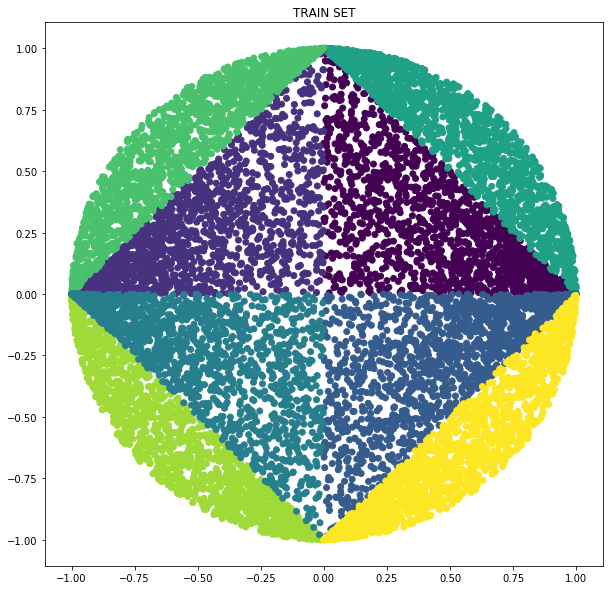

In [23]:
plt.figure(figsize=(10,10))
plt.title('TRAIN SET')
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.show()

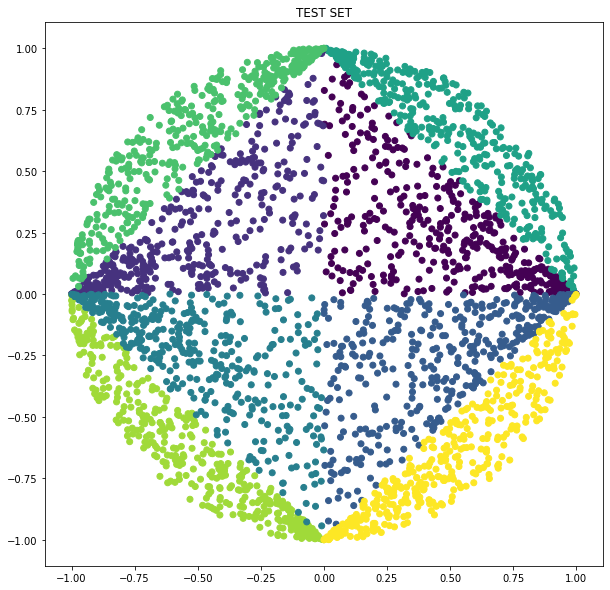

In [24]:
plt.figure(figsize=(10,10))
plt.title('TEST SET')
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.show()

## 5. Building our network

### 5.1 - First steps

In [25]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from sklearn.metrics import confusion_matrix

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu") #gpu

In [26]:
print(device)

cuda:0


### 5.2 - Preprocessing the data

In [27]:
# tensors
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)
# transforming in a tensordataset
train = TensorDataset(inputs, targets)

In [28]:
train[0:3]

(tensor([[0.2862, 0.5505],
         [0.8121, 0.1377],
         [0.3046, 0.5107]]),
 tensor([0., 0., 0.]))

In [29]:
# batching to an iterator
trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

In [30]:
next(iter(trainloader))

[tensor([[ 0.1473,  0.0840],
         [ 0.8618, -0.2457],
         [ 0.3505, -0.8225],
         [ 0.3930,  0.3970],
         [-0.7144, -0.1412],
         [-0.6381,  0.2247],
         [ 0.7335,  0.1453],
         [ 0.0623, -0.9879],
         [ 0.0656, -0.9494],
         [-0.8605, -0.1271],
         [-0.1261, -0.1010],
         [ 0.3000,  0.8740],
         [ 0.5733, -0.0819],
         [ 0.5717, -0.7971],
         [ 0.5662, -0.4630],
         [-0.7065,  0.1707],
         [-0.9071, -0.0455],
         [-0.7242, -0.2564],
         [ 0.4434,  0.8600],
         [-0.2987, -0.8895],
         [ 0.4615, -0.8082],
         [-0.3132,  0.8763],
         [-0.1212, -0.9713],
         [ 0.6065,  0.7829],
         [-0.9363, -0.2443],
         [-0.8872, -0.4435],
         [ 0.6807,  0.6896],
         [-0.7296, -0.3066],
         [-0.1786,  0.2547],
         [ 0.4875, -0.4808],
         [ 0.6244, -0.4700],
         [ 0.1929,  0.8113],
         [ 0.8531,  0.3967],
         [-0.5718,  0.1674],
         [-0.1

In [31]:
https://www.youtube.com/watch?v=IHZwWFHWa-w

SyntaxError: invalid syntax (<ipython-input-31-64cbffcc96d4>, line 1)

### 5.3 - Building our Network

In [32]:
model = nn.Sequential(nn.Linear(2, 10),
                      nn.ReLU(),
                      nn.Linear(10, 10),
                      nn.ReLU(),
                      nn.Linear(10, 8),
                      nn.Softmax(dim=1))

In [33]:
model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=8, bias=True)
  (5): Softmax(dim=1)
)

In [34]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.3455, -0.5751],
         [ 0.3424,  0.2462],
         [ 0.1579,  0.6544],
         [ 0.3605,  0.0528],
         [ 0.4109,  0.0905],
         [-0.1789, -0.4823],
         [ 0.1154,  0.6872],
         [ 0.1199,  0.1867],
         [-0.5199, -0.0080],
         [-0.5461,  0.6918]], requires_grad=True),
 Parameter containing:
 tensor([-0.5878, -0.4575,  0.5172, -0.3288, -0.4008, -0.6528, -0.6903,  0.4925,
         -0.0745, -0.2521], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0918,  0.1702,  0.0344,  0.1315,  0.0220,  0.1242,  0.2230, -0.2457,
          -0.1327, -0.1745],
         [-0.2302, -0.1188, -0.1292,  0.1224,  0.1786, -0.1640,  0.2859,  0.3082,
          -0.1963, -0.1391],
         [-0.0659, -0.0795,  0.1123, -0.2205, -0.0876,  0.2017, -0.1720, -0.0810,
           0.2048, -0.3102],
         [ 0.1338, -0.2261, -0.1482,  0.2804,  0.2911, -0.1322,  0.1650,  0.2026,
           0.1816,  0.2565],
         [-0.3130, -0.2448,  0.2256, -0.1004,

In [35]:
model[0].weight, model[0].bias

(Parameter containing:
 tensor([[-0.3455, -0.5751],
         [ 0.3424,  0.2462],
         [ 0.1579,  0.6544],
         [ 0.3605,  0.0528],
         [ 0.4109,  0.0905],
         [-0.1789, -0.4823],
         [ 0.1154,  0.6872],
         [ 0.1199,  0.1867],
         [-0.5199, -0.0080],
         [-0.5461,  0.6918]], requires_grad=True),
 Parameter containing:
 tensor([-0.5878, -0.4575,  0.5172, -0.3288, -0.4008, -0.6528, -0.6903,  0.4925,
         -0.0745, -0.2521], requires_grad=True))

In [36]:
inputs,labels = next(iter(trainloader))

Vamos testar nossa rede sem o treino, para ver como ela se comporta em relação as previsões esperadas.

In [37]:
output = model(inputs)
output

tensor([[0.1232, 0.1454, 0.1502, 0.1101, 0.1100, 0.1359, 0.1025, 0.1229],
        [0.1317, 0.1375, 0.1503, 0.1108, 0.1071, 0.1319, 0.1032, 0.1277],
        [0.1280, 0.1407, 0.1527, 0.1040, 0.1061, 0.1392, 0.1009, 0.1284],
        [0.1319, 0.1374, 0.1503, 0.1100, 0.1063, 0.1325, 0.1036, 0.1279],
        [0.1317, 0.1378, 0.1507, 0.1094, 0.1065, 0.1329, 0.1030, 0.1280],
        [0.1299, 0.1388, 0.1520, 0.1063, 0.1064, 0.1364, 0.1017, 0.1286],
        [0.1231, 0.1454, 0.1502, 0.1101, 0.1100, 0.1359, 0.1024, 0.1229],
        [0.1308, 0.1408, 0.1520, 0.1046, 0.1026, 0.1372, 0.1041, 0.1279],
        [0.1229, 0.1444, 0.1507, 0.1083, 0.1104, 0.1380, 0.1010, 0.1244],
        [0.1239, 0.1463, 0.1495, 0.1125, 0.1093, 0.1331, 0.1043, 0.1212],
        [0.1279, 0.1420, 0.1500, 0.1124, 0.1084, 0.1315, 0.1037, 0.1241],
        [0.1231, 0.1438, 0.1510, 0.1076, 0.1104, 0.1386, 0.1005, 0.1251],
        [0.1311, 0.1400, 0.1518, 0.1047, 0.1024, 0.1373, 0.1045, 0.1283],
        [0.1311, 0.1396, 0.1518, 0.104

In [38]:
probs = F.softmax(output, dim=1)

In [39]:
max_probs, preds = torch.max(probs, dim=1)

In [40]:
max_probs, preds

(tensor([0.1282, 0.1282, 0.1285, 0.1282, 0.1282, 0.1284, 0.1282, 0.1284, 0.1282,
         0.1281, 0.1282, 0.1283, 0.1284, 0.1284, 0.1284, 0.1280, 0.1282, 0.1284,
         0.1282, 0.1284, 0.1283, 0.1284, 0.1283, 0.1283, 0.1284, 0.1282, 0.1284,
         0.1280, 0.1282, 0.1282, 0.1283, 0.1280, 0.1282, 0.1282, 0.1284, 0.1283,
         0.1281, 0.1283, 0.1284, 0.1284, 0.1284, 0.1282, 0.1284, 0.1284, 0.1283,
         0.1282, 0.1284, 0.1281, 0.1282, 0.1284, 0.1282, 0.1282, 0.1284, 0.1281,
         0.1284, 0.1284, 0.1284, 0.1282, 0.1284, 0.1282, 0.1283, 0.1283, 0.1283,
         0.1282], grad_fn=<MaxBackward0>),
 tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [41]:
torch.sum(preds == labels)

tensor(8)

In [42]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [43]:
accuracy(output, labels)

tensor(0.1250)

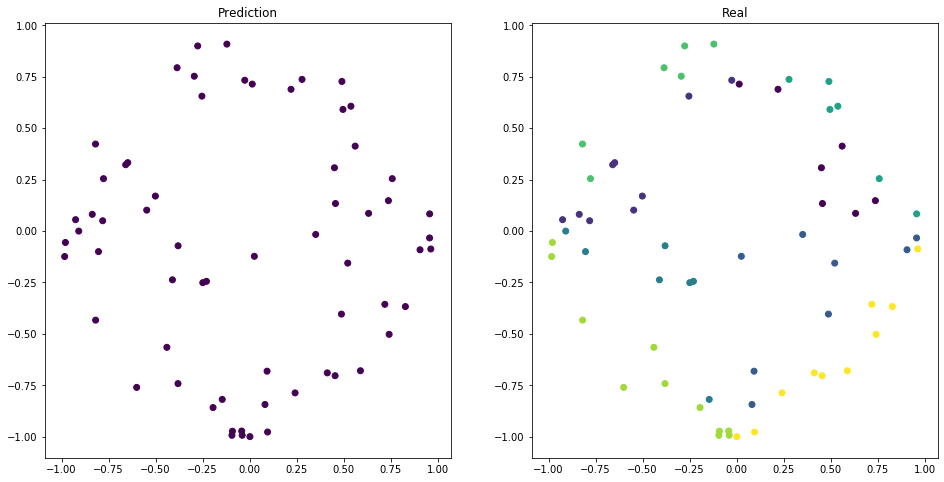

In [49]:
inputs = inputs.detach().numpy()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes[0].set_title('Prediction')
axes[0].scatter(inputs[:,0], inputs[:,1], c = preds)
axes[1].set_title('Real')
axes[1].scatter(inputs[:,0], inputs[:,1], c = labels)
plt.show()

Bem ruim :(

## 5.4 - Entendendo o aprendizado

Para a rede neural aprender, precisamos corrigir o erro dela de acordo com as previsões feitas. Dessa forma, temos que ter uma função que consiga quantificar nossa estimativa, como vimos na definição de Machine Learning. Com isso, aprendemos agora o conceito de loss, que servirá como uma forma de alimentarmos nosso modelos com informações dos nossos dados e adaptar os pesos e bias de forma a atingirmos um grau de certeza maior.

Então vamos simplesmente usar a acurácia e é isso, certo? Errado.

* Acurácia não é uma função diferenciável (max e ==), então não podemos usar para calcular os gradientes necessários.

* Não é muito bom para correção, pois não nos mostra uma estimativa do erro, apenas se foi certo ou errado para cada exemplo.

Para esse problema, estamos utilizando a CrossEntropyLoss.

In [ ]:
criterion = nn.CrossEntropyLoss()

Agora que temos uma espécie de juiz que vai dizer se estamos mais certos ou mais errados, precisamos investir numa espécie de educador, que vai ensinar nosso modelo a partir do que o juiz disser. Esse aprendizado será feito através do nosso otimizador.

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# falar sobre learning rate, gradient descent, etc.

### 5.5 - Treinando o modelo

In [ ]:
epochs = 1000
for e in range(epochs):
    running_loss = 0
    for coords, labels in trainloader:
        
        optimizer.zero_grad()
        
        output = model(coords)
        loss = criterion(output, labels.long())
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    if e % 10 == 0 or e == epochs - 1:
        print(f"epoch {e} loss: {running_loss/len(trainloader)}")

In [ ]:
dataiter = iter(trainloader)

coords, labels = next(dataiter)

# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model(coords)

probs = F.softmax(logits, dim=1)
output = np.argmax(probs, axis=1)

In [ ]:
output

In [ ]:
accuracy(logits, labels)

In [ ]:
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model(torch.tensor(X_test))
    
probs = F.softmax(logits, dim=1)
output = np.argmax(probs, axis=1)

In [ ]:
accuracy(logits, torch.tensor(y_test))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes[0].set_title('Prediction')
axes[0].scatter(X_test[:,0], X_test[:,1], c = output)
axes[1].set_title('Real')
axes[1].scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.show()

In [ ]:
confusion_matrix(labels,output)